In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
from sklearn import preprocessing, svm
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split  # Import for train-test splitting
import datetime
import pickle

In [2]:
df = pd.read_csv("data/AAPL.csv").set_index("Date")
pd.set_option("display.max_columns", None)
df

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
1980-12-12,0.513393,0.515625,0.513393,0.513393,0.406782,117258400
1980-12-15,0.488839,0.488839,0.486607,0.486607,0.385558,43971200
1980-12-16,0.453125,0.453125,0.450893,0.450893,0.357260,26432000
1980-12-17,0.462054,0.464286,0.462054,0.462054,0.366103,21610400
1980-12-18,0.475446,0.477679,0.475446,0.475446,0.376715,18362400
...,...,...,...,...,...,...
2020-03-26,246.520004,258.679993,246.360001,258.440002,258.440002,63021800
2020-03-27,252.750000,255.869995,247.050003,247.740005,247.740005,51054200
2020-03-30,250.740005,255.520004,249.399994,254.809998,254.809998,41994100


## Add High Changing Percentage and Percentage Change

In [3]:
df['HT_PCT'] = (df['High'] - df['Close']) / df['Close'] * 100
df['PCT_Change'] = (df['Close'] - df['Open']) / df['Open'] * 100
df.head()

new_df = df[['HT_PCT', 'PCT_Change']]
new_df.head()


,HT_PCT,PCT_Change
Date,,
1980-12-12,0.434781,0.000000
1980-12-15,0.458720,-0.456625
1980-12-16,0.495048,-0.492609
1980-12-17,0.483090,0.000000
1980-12-18,0.469482,0.000000


# Regression Model with Shifting Method

In [4]:
forcast_col = 'Close'
df.fillna(-99999, inplace=True)
forcast_out = int(math.ceil(0.001 * len(df) ))
print(forcast_out)
df['Predict_close_price'] = df[forcast_col].shift(-forcast_out)
df.dropna(inplace=True)
df.head(12)

10


,Open,High,Low,Close,Adj Close,Volume,HT_PCT,PCT_Change,Predict_close_price
Date,,,,,,,,,
1980-12-12,0.513393,0.515625,0.513393,0.513393,0.406782,117258400,0.434781,0.000000,0.642857
1980-12-15,0.488839,0.488839,0.486607,0.486607,0.385558,43971200,0.458720,-0.456625,0.627232
1980-12-16,0.453125,0.453125,0.450893,0.450893,0.357260,26432000,0.495048,-0.492609,0.609375
1980-12-17,0.462054,0.464286,0.462054,0.462054,0.366103,21610400,0.483090,0.000000,0.616071
1980-12-18,0.475446,0.477679,0.475446,0.475446,0.376715,18362400,0.469482,0.000000,0.602679
1980-12-19,0.504464,0.506696,0.504464,0.504464,0.399707,12157600,0.442476,0.000000,0.575893
1980-12-22,0.529018,0.531250,0.529018,0.529018,0.419162,9340800,0.421939,0.000000,0.551339
1980-12-23,0.551339,0.553571,0.551339,0.551339,0.436848,11737600,0.404857,0.000000,0.540179
1980-12-24,0.580357,0.582589,0.580357,0.580357,0.459840,12000800,0.384614,0.000000,0.569196


## Check the Accurancy of the Shifting Method using Linear Regression

In [5]:
X = np.array(df.drop(['Predict_close_price'], axis=1))
print(X[0])
y = np.array(df['Predict_close_price'])
X = preprocessing.scale(X) # Make a Normal Distribution
print(X[0])

[5.13392866e-01 5.15625000e-01 5.13392866e-01 5.13392866e-01
 4.06781554e-01 1.17258400e+08 4.34780943e-01 0.00000000e+00]
[-0.54918184 -0.5493318  -0.54847494 -0.54881719 -0.53145468  0.36518328
 -0.6975068   0.00518592]


In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.19)
clf = LinearRegression()
clf.fit(X_train, y_train)
accuracy = clf.score(X_test, y_test)

print("Accuracy with linear regression is:", accuracy)

Accuracy with linear regression is: 0.9960680600677366


## Check the Accuracy with SVM(Support Vector Machine) (Only Test Purpose)

In [7]:
clf_svm = svm.SVR()
clf_svm.fit(X_train, y_train)
accuracy_svm = clf.score(X_test, y_test)

print("Accuracy with svm is:", accuracy_svm)

Accuracy with svm is: 0.9960680600677366


# Forcasting and Predicting 

In [8]:
forcast_col = 'Close'
df.fillna(-99999, inplace=True)
forcast_out = int(math.ceil(0.001 * len(df) ))
print("Forcast Out:", forcast_out)
df['Predict_close_price'] = df[forcast_col].shift(-forcast_out)

X = np.array(df.drop(['Predict_close_price'], axis=1))
X = preprocessing.scale(X)
X_lately = X[-forcast_out: ] 
X = X[:-forcast_out] 
df.dropna(inplace=True)
y = np.array(df['Predict_close_price'])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.01)
clf = LinearRegression(n_jobs=-1)
clf.fit(X_train, y_train)
accuracy = clf.score(X_test, y_test)

forcast_set = clf.predict(X_lately)
print(forcast_set, accuracy, forcast_out)

Forcast Out: 10
[294.60684064 287.13139474 263.71438029 275.43953047 275.07725683
 243.27482828 258.7299831  237.8841764  241.98886449 241.41978751] 0.9958668131947992 10


In [9]:
df['Forcast'] = np.nan

last_date_data = df.index[-1]
last_date = pd.to_datetime(last_date_data)
one_day = 86400
last_unix = last_date.timestamp()
next_unix = last_unix + one_day
print(last_date)
df.tail()

2020-03-04 00:00:00


,Open,High,Low,Close,Adj Close,Volume,HT_PCT,PCT_Change,Predict_close_price,Forcast
Date,,,,,,,,,,
2020-02-27,281.100006,286.000000,272.959991,273.519989,273.519989,80151400,4.562742,-2.696555,248.229996,NaN
2020-02-28,257.260010,278.410004,256.369995,273.359985,273.359985,106721200,1.847388,6.258250,277.970001,NaN
2020-03-02,282.279999,301.440002,277.720001,298.809998,298.809998,85349300,0.880160,5.855887,242.210007,NaN
2020-03-03,303.670013,304.000000,285.799988,289.320007,289.320007,79868900,5.073964,-4.725526,252.860001,NaN
2020-03-04,296.440002,303.399994,293.130005,302.739990,302.739990,54794600,0.218010,2.125215,246.669998,NaN


In [10]:
for item in forcast_set:
    next_date = datetime.datetime.fromtimestamp(next_unix)
    datetime_obj = datetime.datetime.strptime(str(next_date), '%Y-%m-%d %H:%M:%S')
    next_date_only_string = datetime_obj.strftime('%Y-%m-%d')
    
    next_unix += one_day
    df.loc[next_date_only_string] = [np.nan for _ in range(len(df.columns) -1 )] + [item]

df.tail(20)

,Open,High,Low,Close,Adj Close,Volume,HT_PCT,PCT_Change,Predict_close_price,Forcast
Date,,,,,,,,,,
2020-02-20,322.630005,324.649994,318.209991,320.299988,320.299988,25141500.0,1.358104,-0.722195,292.920013,NaN
2020-02-21,318.619995,320.450012,310.500000,313.049988,313.049988,32388500.0,2.363848,-1.748166,289.029999,NaN
2020-02-24,297.260010,304.179993,289.230011,298.179993,298.179993,55548800.0,2.012207,0.309488,266.170013,NaN
2020-02-25,300.950012,302.529999,286.130005,288.079987,288.079987,57668400.0,5.015972,-4.276466,285.339996,NaN
2020-02-26,286.529999,297.880005,286.500000,292.649994,292.649994,49513700.0,1.787122,2.135900,275.429993,NaN
2020-02-27,281.100006,286.000000,272.959991,273.519989,273.519989,80151400.0,4.562742,-2.696555,248.229996,NaN
2020-02-28,257.260010,278.410004,256.369995,273.359985,273.359985,106721200.0,1.847388,6.258250,277.970001,NaN
2020-03-02,282.279999,301.440002,277.720001,298.809998,298.809998,85349300.0,0.880160,5.855887,242.210007,NaN
2020-03-03,303.670013,304.000000,285.799988,289.320007,289.320007,79868900.0,5.073964,-4.725526,252.860001,NaN


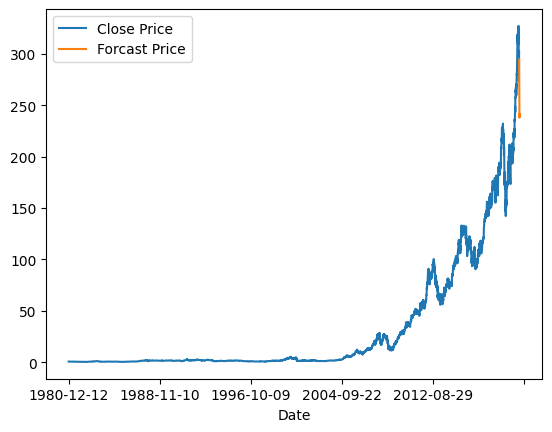

In [11]:
df['Close'].plot(label="Close Price")
df['Forcast'].plot(label="Forcast Price")
plt.legend()
plt.show()